In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import seaborn as sns

# Study data files
average_scores_path = "naep.csv"
fed_revenue_path = "states.csv"

# Read the mouse data and the study results
scores_data = pd.read_csv(average_scores_path)
revenue_data = pd.read_csv(fed_revenue_path)

# Combine the data into a single dataset
merged_data_df = pd.merge(scores_data, revenue_data, how='inner', left_on=['STATE','YEAR'], right_on=['STATE', 'YEAR'])


# Display the data table for preview
merged_data_df

# output file (csv)
output_data_file = "clean_math_8.csv"
output_data_file = "clean_reading_8.csv"

In [2]:
test_subject = merged_data_df.groupby(['TEST_SUBJECT'])
test_subject.head()

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,2015,Alabama,230.9774227,Mathematics,4,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
1,2015,Alabama,266.5553185,Mathematics,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
2,2015,Alabama,217.0490898,Reading,4,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
3,2015,Alabama,258.7537615,Reading,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
5,2015,Alaska,280.4934562,Mathematics,8,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
6,2015,Alaska,212.7926002,Reading,4,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
7,2015,Alaska,260.3170188,Reading,8,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
8,2015,Arizona,237.6117554,Mathematics,4,944978.0,8230507,1093834,3232013,3904660,7902600,3846357,2880184,478876.0,497662
10,2015,Arizona,215.3113365,Reading,4,944978.0,8230507,1093834,3232013,3904660,7902600,3846357,2880184,478876.0,497662


In [6]:
year_2015 = merged_data_df[(merged_data_df['YEAR'] == 2015)]

math = year_2015[year_2015['TEST_SUBJECT'] == 'Mathematics']
#math
grade_8_math = math[math['TEST_YEAR'] == 8]
grade_8_math.head()

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
1,2015,Alabama,266.5553185,Mathematics,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
5,2015,Alaska,280.4934562,Mathematics,8,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
9,2015,Arizona,282.9194894,Mathematics,8,944978.0,8230507,1093834,3232013,3904660,7902600,3846357,2880184,478876.0,497662
13,2015,Arkansas,275.0647564,Mathematics,8,479682.0,5308625,581412,4075118,652095,5350543,2620399,1772639,290396.0,511556
17,2015,California,275.324573,Mathematics,8,6226523.0,78248042,7556365,42360470,28331207,78365958,38951948,23501848,3754315.0,6373893


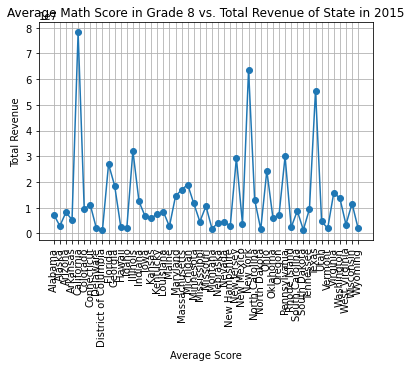

In [7]:
states = grade_8_math['STATE']
y_axis = grade_8_math['AVG_SCORE']

# math test score in year 8 vs. revenue in 2015
plt.plot(grade_8_math['AVG_SCORE'], grade_8_math['TOTAL_REVENUE'], marker = 'o')

#label the x axis tick marks, using index values so names of drug regimen appear
tick_locations = [value for value in y_axis]
plt.xticks(tick_locations, states)

# rotate x axis labels for clarity
plt.xticks(rotation=90)


# give graph labels and grid
plt.title(f'Average Math Score in Grade 8 vs. Total Revenue of State in 2015')
plt.xlabel('Average Score')
plt.ylabel('Total Revenue')
plt.grid(True)

# show the plot
plt.show()

In [10]:
year_2015_2 = merged_data_df[(merged_data_df['YEAR'] == 2015)]

reading = year_2015[year_2015['TEST_SUBJECT'] == 'Reading']
#math
grade_8_reading = reading[reading['TEST_YEAR'] == 8]
grade_8_reading.head()

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
3,2015,Alabama,258.7537615,Reading,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
7,2015,Alaska,260.3170188,Reading,8,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
11,2015,Arizona,262.7693918,Reading,8,944978.0,8230507,1093834,3232013,3904660,7902600,3846357,2880184,478876.0,497662
15,2015,Arkansas,258.768268,Reading,8,479682.0,5308625,581412,4075118,652095,5350543,2620399,1772639,290396.0,511556
19,2015,California,258.9868426,Reading,8,6226523.0,78248042,7556365,42360470,28331207,78365958,38951948,23501848,3754315.0,6373893


In [11]:
grade_8_reading = grade_8_reading.drop(columns=['FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 
                              'TOTAL_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE',
                             'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE'])


In [12]:
spending_per_student = round((grade_8_reading['INSTRUCTION_EXPENDITURE']*1000)/grade_8_reading['ENROLL'],2)
spending_per_student.head()

3      5194.03
7     11354.14
11     4070.31
15     5462.78
19     6255.81
dtype: float64

In [13]:
grade_8_reading['spending_per_student'] = spending_per_student
grade_8_reading.head()

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE,spending_per_student
3,2015,Alabama,258.7537615,Reading,8,734974.0,7360222,3817479,5194.03
7,2015,Alaska,260.3170188,Reading,8,130755.0,2920986,1484610,11354.14
11,2015,Arizona,262.7693918,Reading,8,944978.0,8230507,3846357,4070.31
15,2015,Arkansas,258.768268,Reading,8,479682.0,5308625,2620399,5462.78
19,2015,California,258.9868426,Reading,8,6226523.0,78248042,38951948,6255.81


In [14]:
grade_8_math = grade_8_math.drop(columns=['FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE','TOTAL_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE'])
grade_8_math.head()

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE
1,2015,Alabama,266.5553185,Mathematics,8,734974.0,7360222,3817479
5,2015,Alaska,280.4934562,Mathematics,8,130755.0,2920986,1484610
9,2015,Arizona,282.9194894,Mathematics,8,944978.0,8230507,3846357
13,2015,Arkansas,275.0647564,Mathematics,8,479682.0,5308625,2620399
17,2015,California,275.324573,Mathematics,8,6226523.0,78248042,38951948


In [15]:
spending_per_student = round((grade_8_math['INSTRUCTION_EXPENDITURE']*1000)/grade_8_math['ENROLL'],2)
spending_per_student
grade_8_math['spending_per_student'] = spending_per_student
grade_8_math.head()

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE,spending_per_student
1,2015,Alabama,266.5553185,Mathematics,8,734974.0,7360222,3817479,5194.03
5,2015,Alaska,280.4934562,Mathematics,8,130755.0,2920986,1484610,11354.14
9,2015,Arizona,282.9194894,Mathematics,8,944978.0,8230507,3846357,4070.31
13,2015,Arkansas,275.0647564,Mathematics,8,479682.0,5308625,2620399,5462.78
17,2015,California,275.324573,Mathematics,8,6226523.0,78248042,38951948,6255.81


In [ ]:
grade_8_math.to_csv('clean_math_8.csv', index=False, header=True)
grade_8_reading.to_csv('clean_reading_8.csv', index=False, header=True)